<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/3_28_%EC%84%B8%EC%85%98_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 비지도 학습 연습 문제**
___
- 출처 : 핸즈온 머신러닝 Ch09 앙상블 학습과 랜덤 포레스트 연습문제 3, 5, 8, 10번
- 이론적 지식을 묻는 문제의 경우 텍스트 셀을 추가하여 정답을 적어주세요.

In [1]:
# import libraries
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### **1. k-평균을 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법을 설명하세요.**
___

엘보우 기법: 이너셔 그래프를 클러스터 개수 k의 함수로 그렸을 때 꺾이는 지점을 선택

실루엣 계수: 모든 샘플에 대해 실루엣 계수를 구한 후 이를 평균내어 계산

### **2. 대규모 데이터셋으로 확장할 수 있는 군집 알고리즘 두 개를 말해보세요. 밀도가 높은 지역을 찾는 군집 알고리즘 두 개는 무엇인가요?**
___

- 대규모 데이터셋: K-평균, BIRCH

- 밀도 높은 군집 또는 알고리즘: DBSCAN, 평균 이동

### **3. 가우시안 혼합이 무엇인가요? 어떤 작업에 사용할 수 있나요?**
___

가우시안 혼합: 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

- 클러스터링, 샘플 생성, 이상치 탐지 등등

### **4. 다음 단계를 따라 올리베티 얼굴 데이터셋을 군집해보자..**
___
전통적인 올리베티 얼굴 데이터셋은 64 X 64 픽셀 크기의 흑백 얼굴 이미지 400개를 가지고 있습니다. 사람 40명의 사진을 10장씩 찍은 것인데, 각 이미지는 4096 크기의 1D 벡터로 펼쳐져 있습니다.

#### **STEP 1. 아래 코드를 실행하여 데이터셋을 불러오세요.**

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


####  **STEP 2. 데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나누세요.**
해당 데이터셋은 매우 작으므로, `StratifiedShuffleSplit` 함수를 이용하여, 계층적 샘플링으로 각 세트에 동일한 사람의 얼굴이 고루 섞이도록 하세요.

In [3]:
olivetti

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

X, y = olivetti.data, olivetti.target  # X: (400, 4096), y: (400,)

# Stratified Shuffle Split 설정
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# 훈련 및 임시 테스트 세트 분할
for train_index, temp_index in splitter.split(X, y):
    X_train, X_temp = X[train_index], X[temp_index]
    y_train, y_temp = y[train_index], y[temp_index]

# 검증 및 테스트 세트 분할
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_index, test_index in splitter.split(X_temp, y_temp):
    X_val, X_test = X_temp[val_index], X_temp[test_index]
    y_val, y_test = y_temp[val_index], y_temp[test_index]

# 데이터셋 크기 출력
print("훈련 세트 크기:", X_train.shape)
print("검증 세트 크기:", X_val.shape)
print("테스트 세트 크기:", X_test.shape)

훈련 세트 크기: (320, 4096)
검증 세트 크기: (40, 4096)
테스트 세트 크기: (40, 4096)


####  **STEP 3. 속도를 높이기 위해 각 학습/검증/테스트 피처 데이터셋에 PCA을 적용하여 데이터의 차원을 줄이세요.**
- `n_componets = 0.99`로 설정합니다.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

####  **STEP 4. 교재에서 다룬 방법을 사용하여 적절한 클러스터 개수를 찾고 k-평균을 사용해 이미지를 군집해보세요.**

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
for k in range(2, 101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    silhouette_scores.append(silhouette_score(X_train_pca, kmeans.labels_))

silhouette_scores

[np.float32(0.15665603),
 np.float32(0.12288661),
 np.float32(0.09437971),
 np.float32(0.09076405),
 np.float32(0.094133034),
 np.float32(0.090235226),
 np.float32(0.09527825),
 np.float32(0.097431764),
 np.float32(0.097972155),
 np.float32(0.091605835),
 np.float32(0.0866856),
 np.float32(0.083974436),
 np.float32(0.090636306),
 np.float32(0.08643641),
 np.float32(0.08465301),
 np.float32(0.0901767),
 np.float32(0.09496702),
 np.float32(0.09610603),
 np.float32(0.09773789),
 np.float32(0.10378929),
 np.float32(0.108782314),
 np.float32(0.10238032),
 np.float32(0.113178626),
 np.float32(0.11860291),
 np.float32(0.12277683),
 np.float32(0.12124789),
 np.float32(0.119891405),
 np.float32(0.11756184),
 np.float32(0.12349961),
 np.float32(0.11623291),
 np.float32(0.115489125),
 np.float32(0.12218754),
 np.float32(0.12481884),
 np.float32(0.12786987),
 np.float32(0.12734652),
 np.float32(0.12998745),
 np.float32(0.13208942),
 np.float32(0.12986884),
 np.float32(0.13317636),
 np.float32(0.13

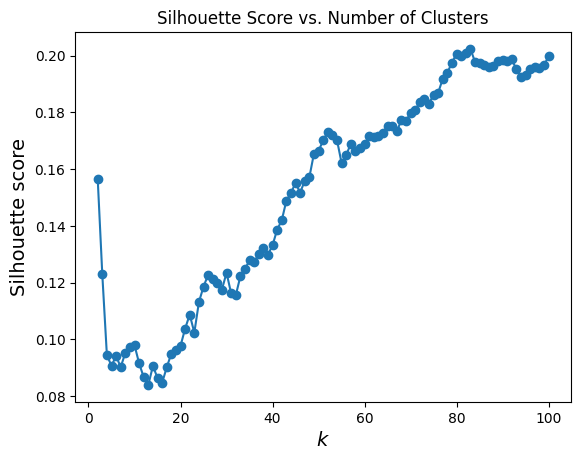

In [9]:
# 실루엣 점수 그래프 그리기
plt.plot(range(2, 101), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

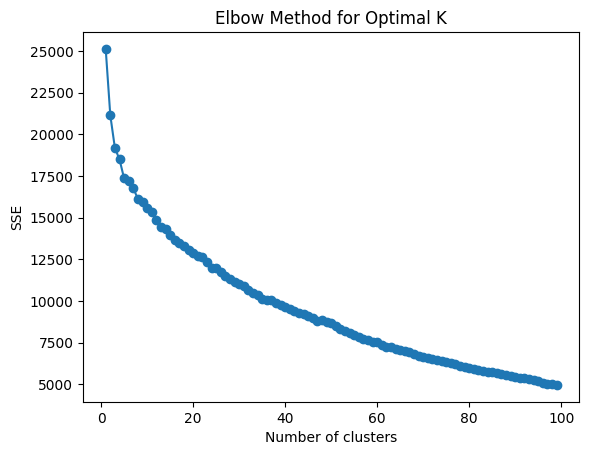

In [13]:
# 엘보우 방법
sse = []
for k in range(1, 100):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.plot(range(1, 100), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

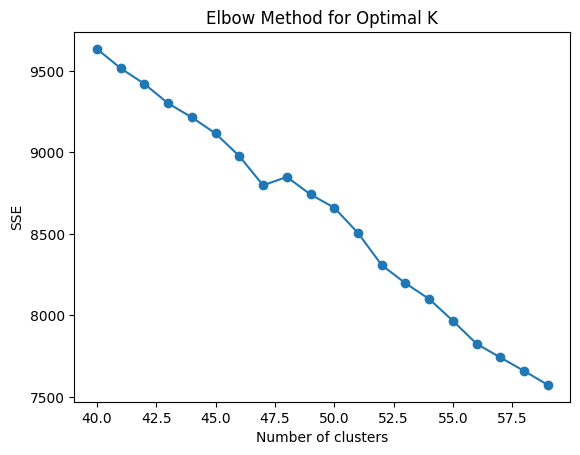

In [14]:
# 엘보우 방법
sse = []
for k in range(40, 60):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.plot(range(40, 60), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [15]:
# K-Means 모델 학습
kmeans = KMeans(n_clusters=48, random_state=42)
kmeans.fit(X_train_pca)

KMeans(n_clusters=48, random_state=42)

In [16]:
# 군집화된 이미지 레이블
labels = kmeans.labels_

####  **STEP 5. 아래 `plot_faces` 함수를 이용하여, 클러스터를 시각화하고, 각 클러스터에 비슷한 얼굴이 들어있는지 확인해보세요.**

In [19]:
# 얼굴 이미지 출력 함수
def plot_faces(X, labels, n_clusters=48):
    # 각 군집에 속한 이미지들을 저장
    for cluster_num in range(n_clusters):  # 군집 번호
        cluster_images = X[labels == cluster_num]

        # 군집별 얼굴 출력
        num_images = len(cluster_images)
        ncols = 5  # 한 행에 출력할 이미지 개수 (한 줄에 최대 5개 이미지)
        nrows = (num_images + ncols - 1) // ncols  # 필요한 행의 개수 계산

        fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 3))
        axes = axes.flatten()

        for i in range(num_images):  # 각 군집에 속한 이미지 출력
            ax = axes[i]
            ax.imshow(cluster_images[i].reshape(64, 64), cmap='gray')
            ax.axis('off')

        # 남은 빈 공간 처리
        for i in range(num_images, len(axes)):
            axes[i].axis('off')

        # 군집 번호 표시
        plt.suptitle(f'Cluster {cluster_num} - {num_images} faces', fontsize=16)
        plt.show()

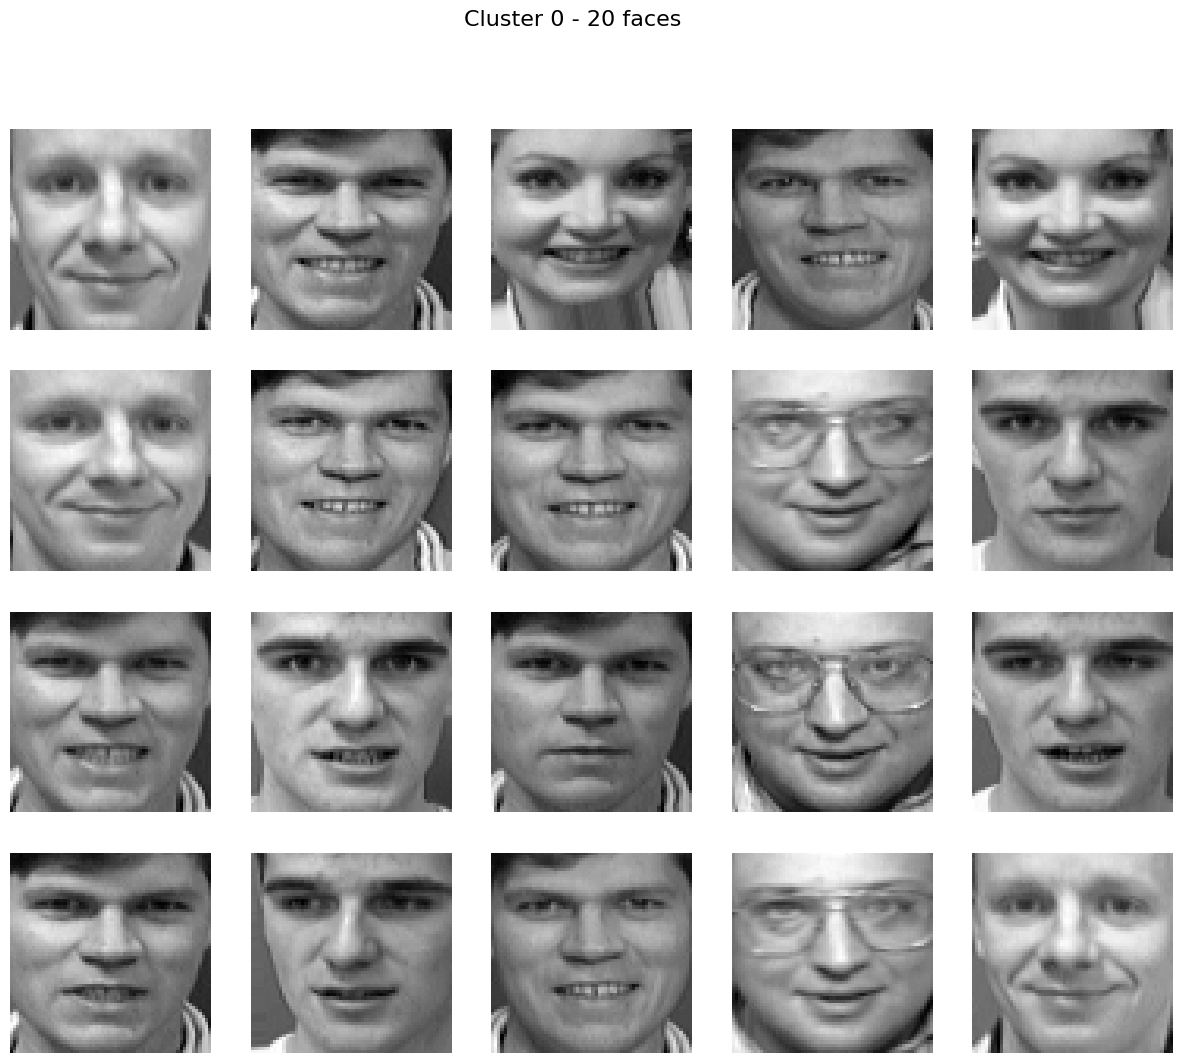

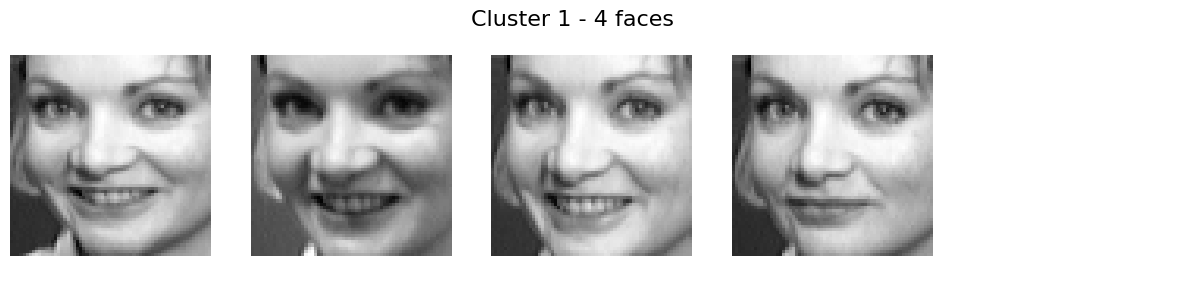

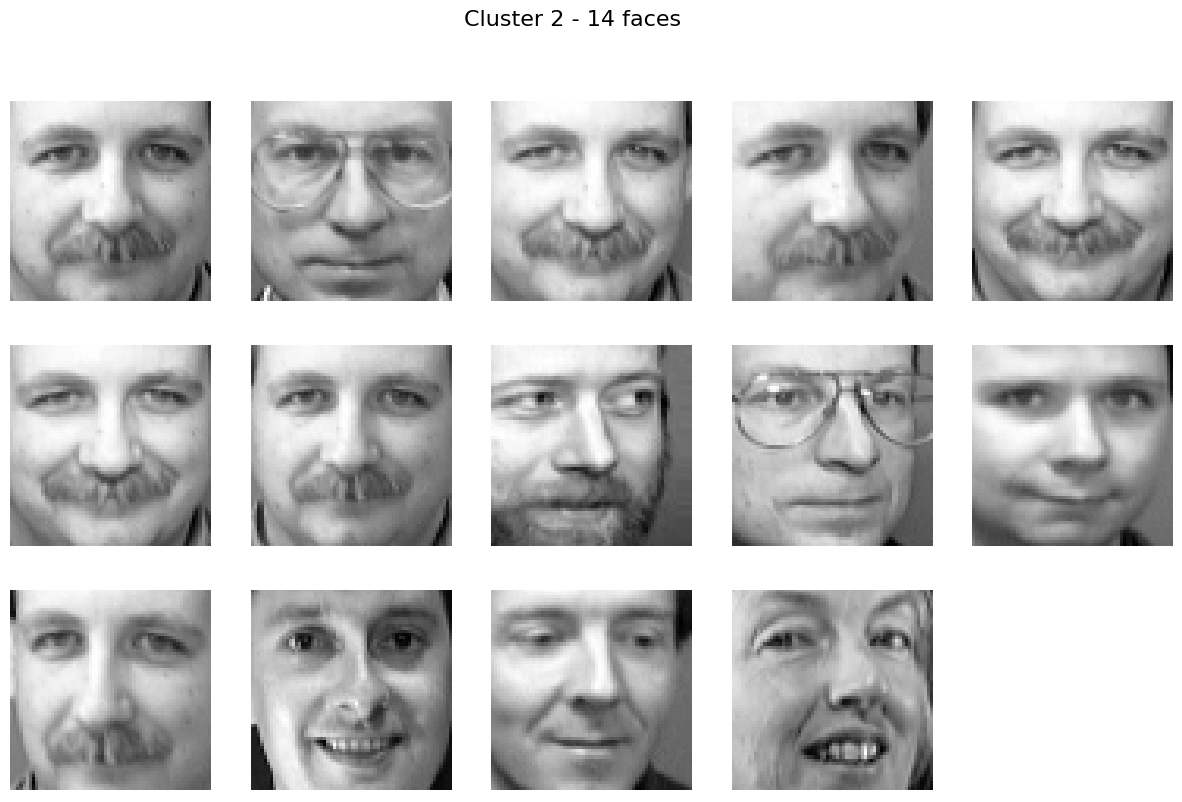

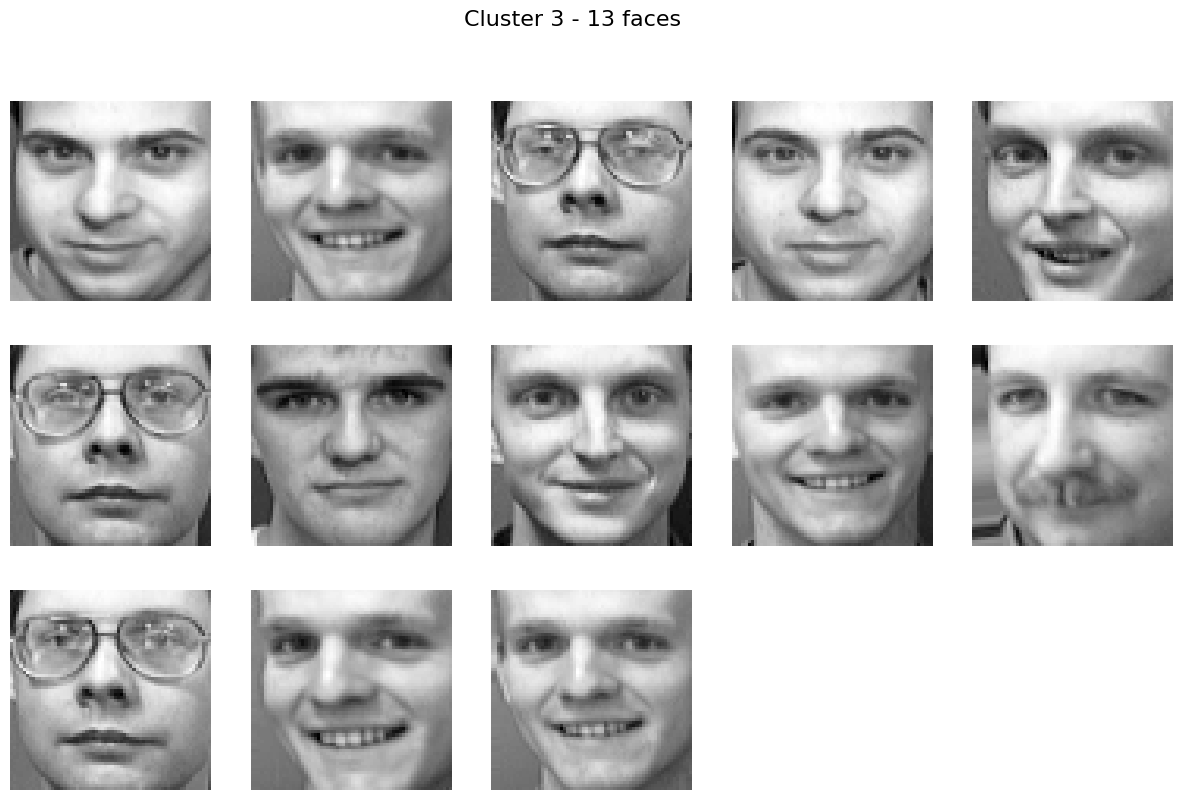

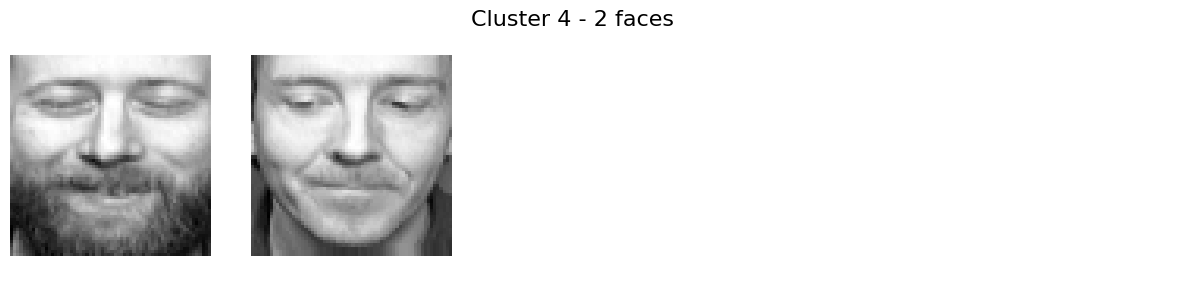

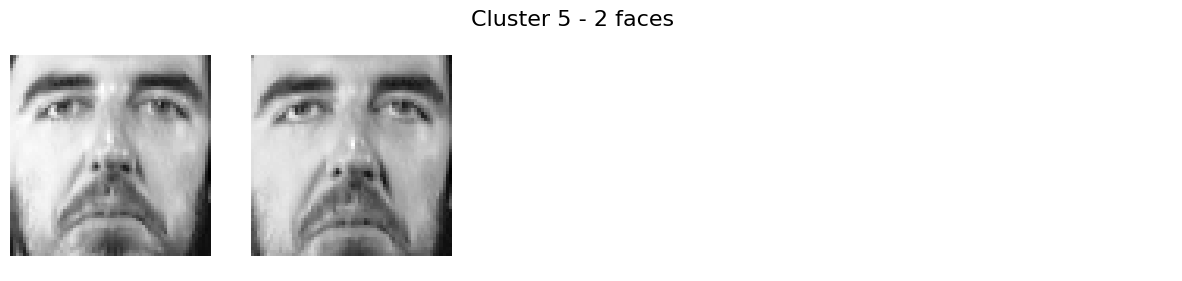

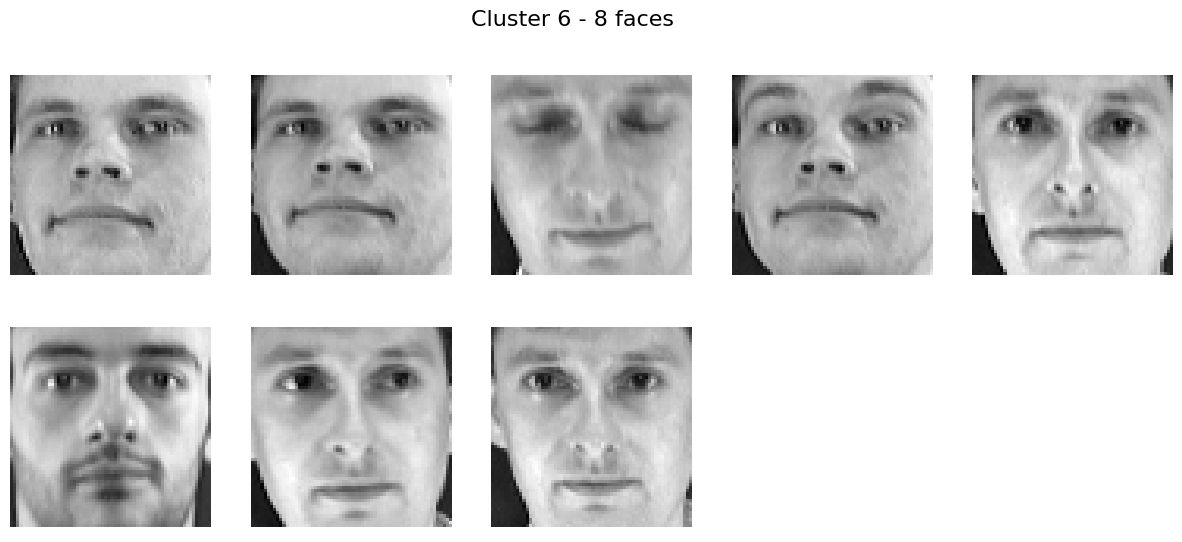

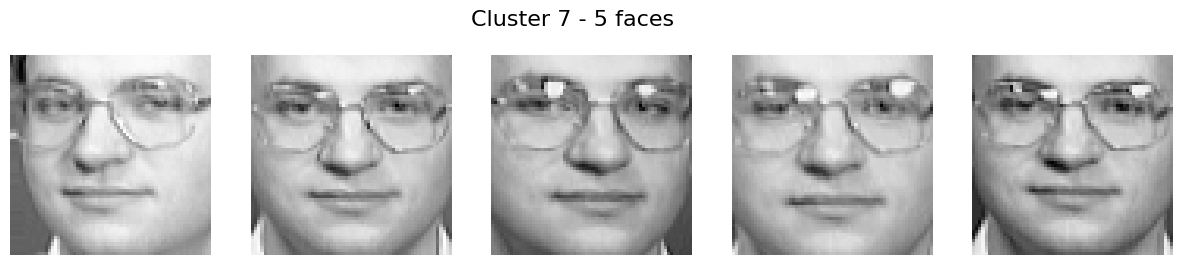

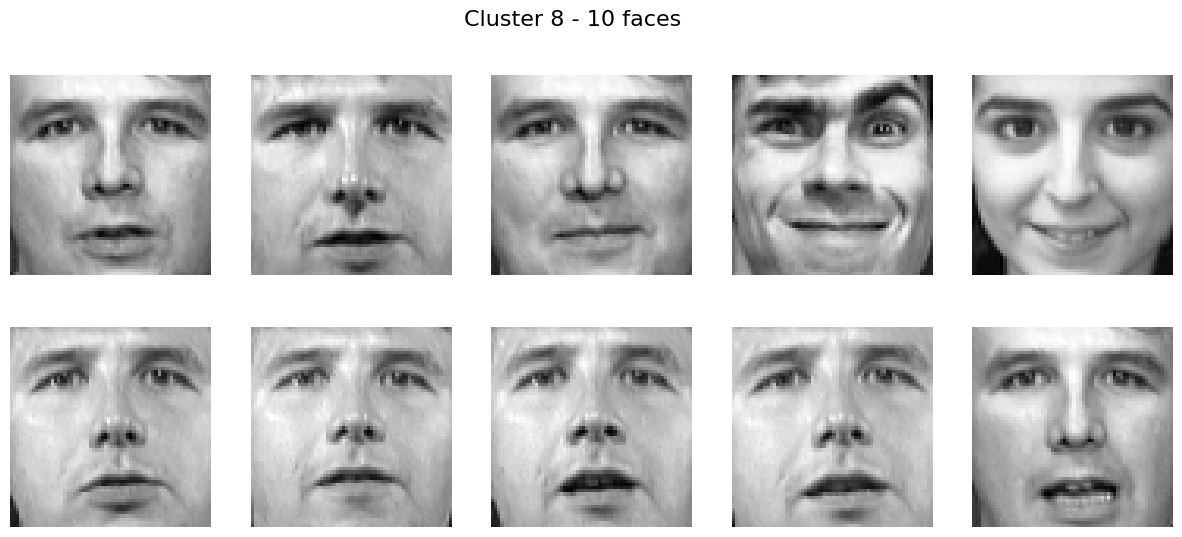

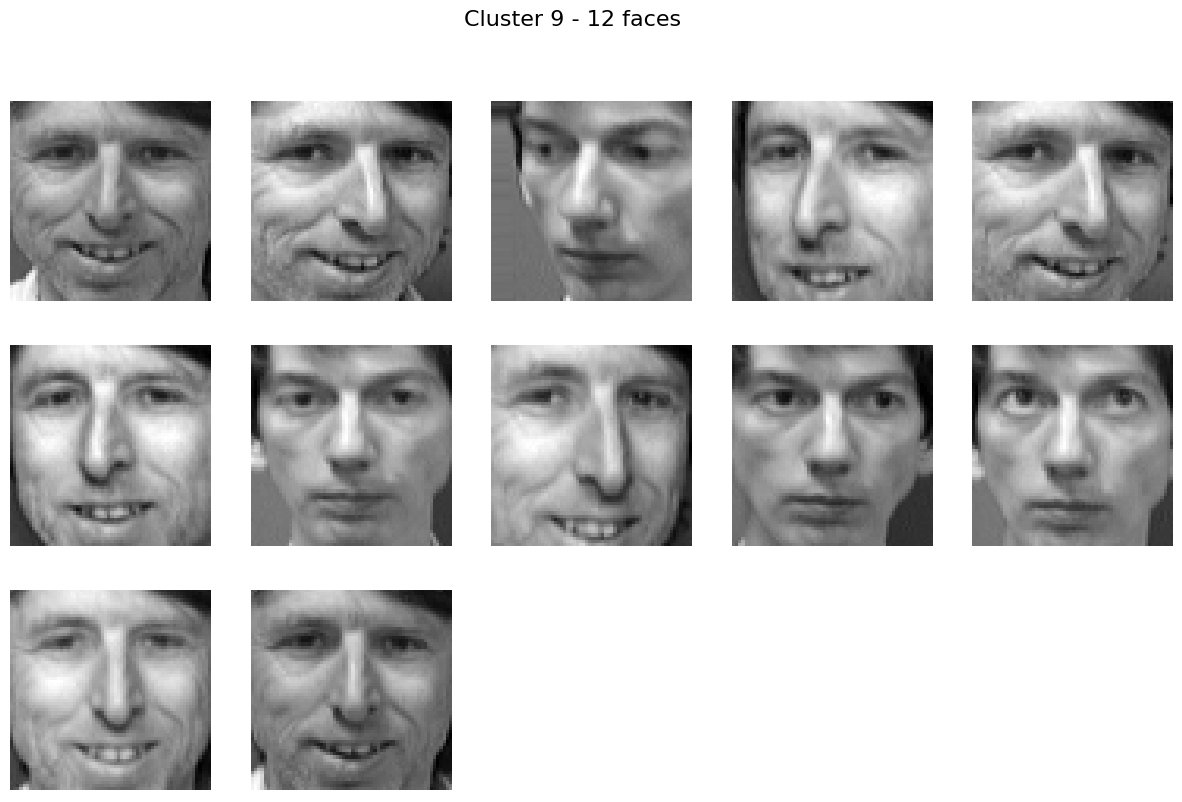

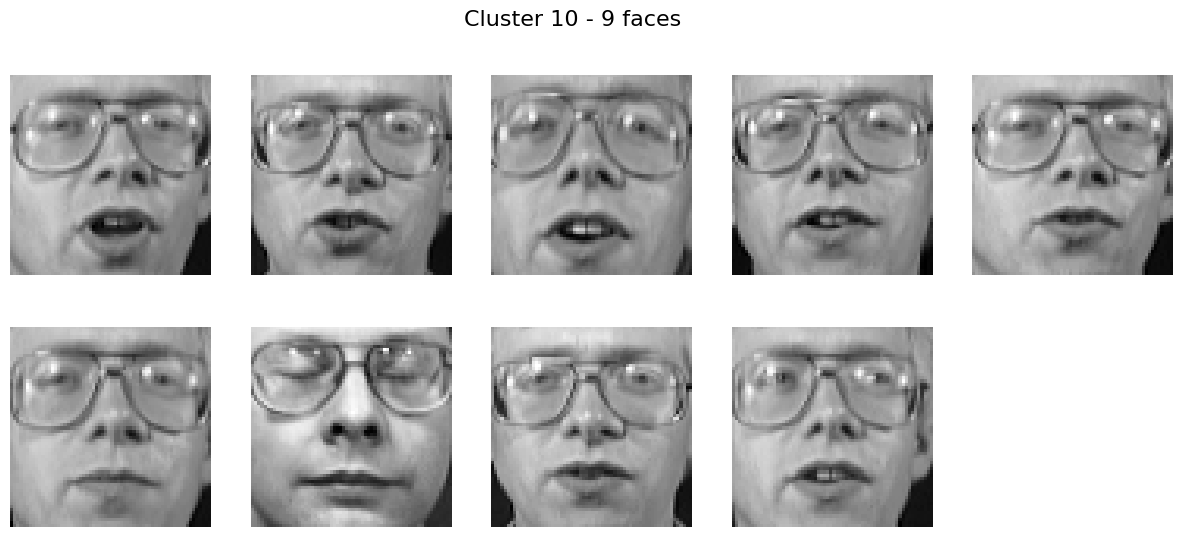

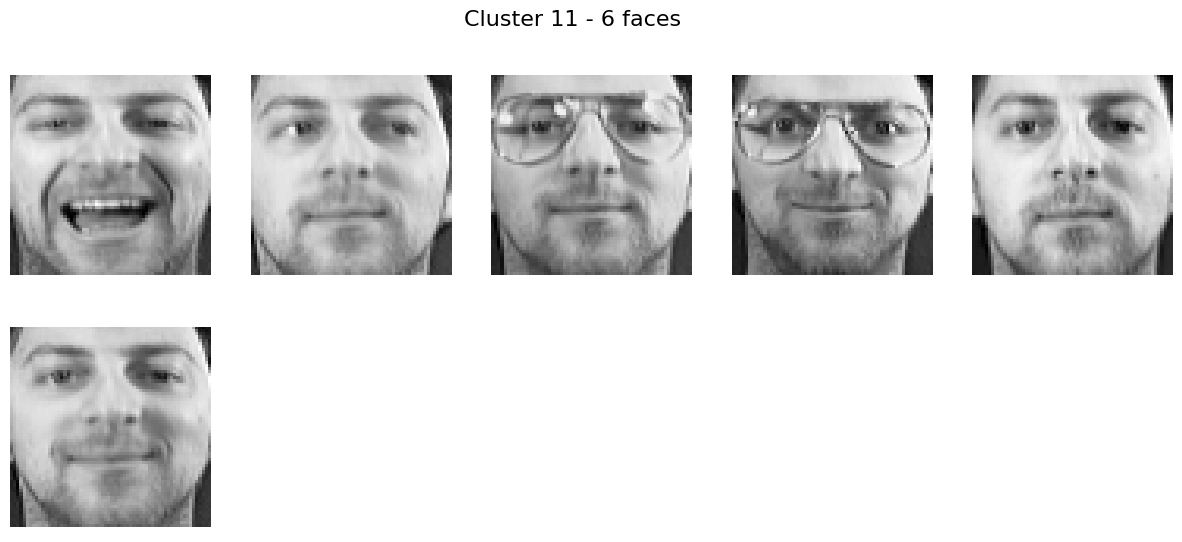

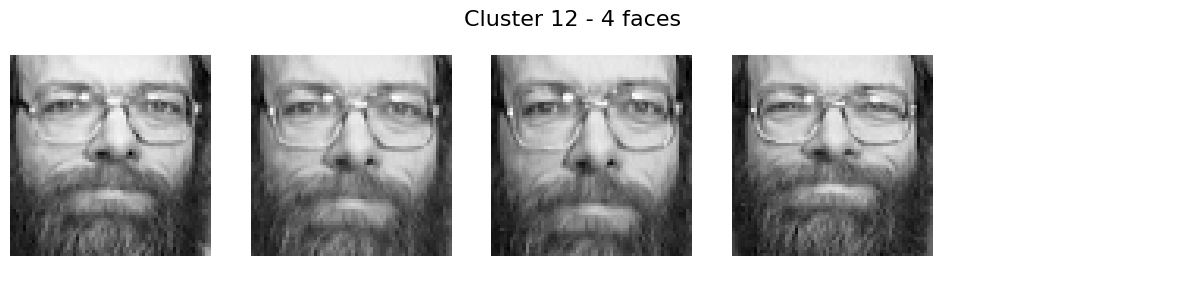

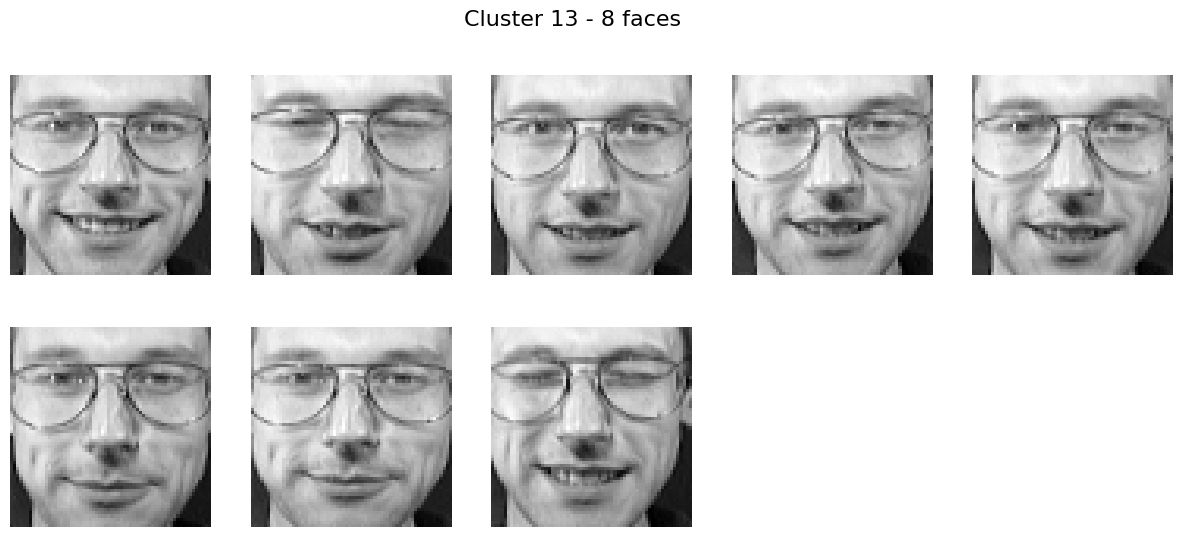

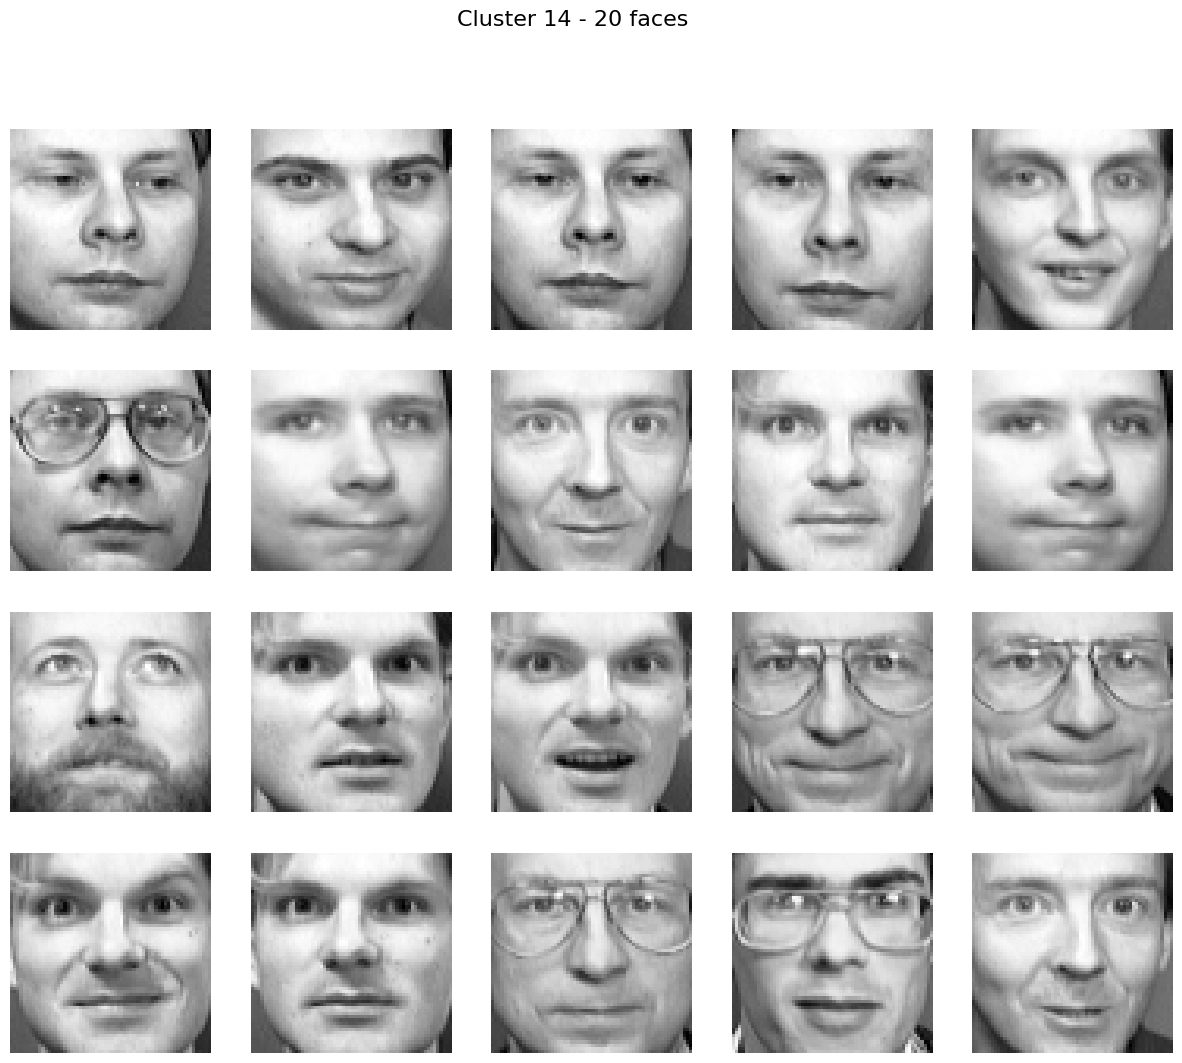

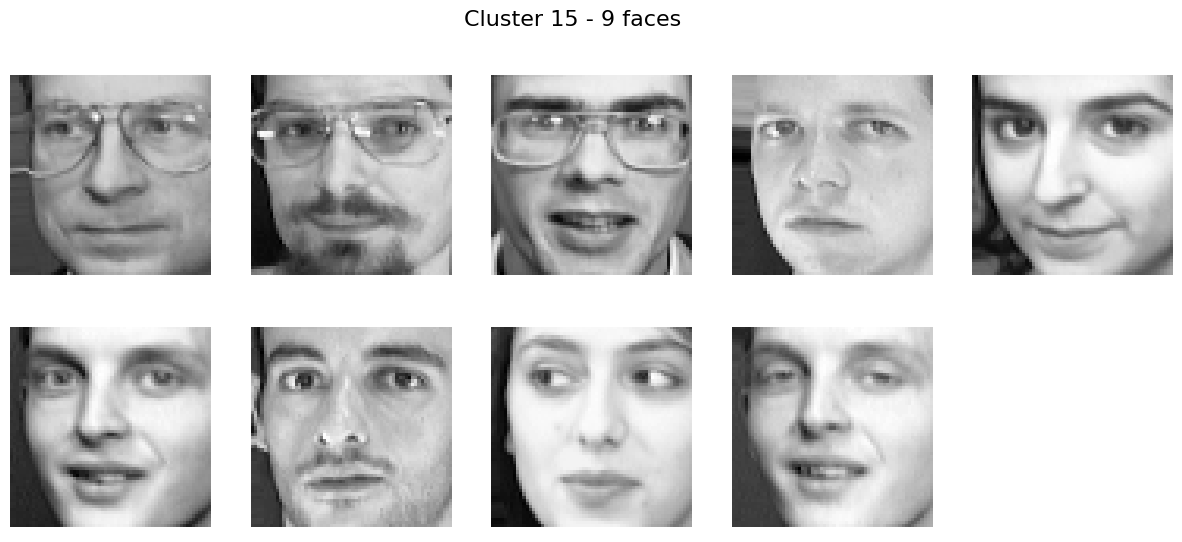

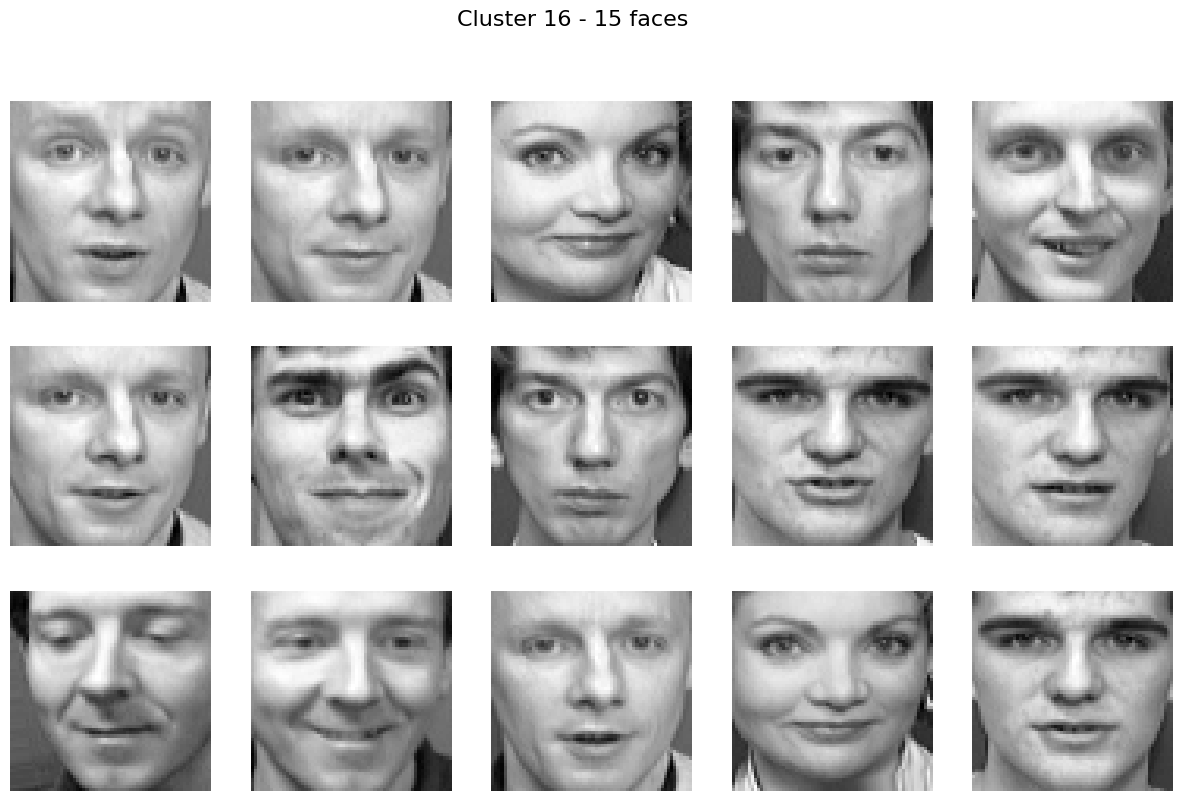

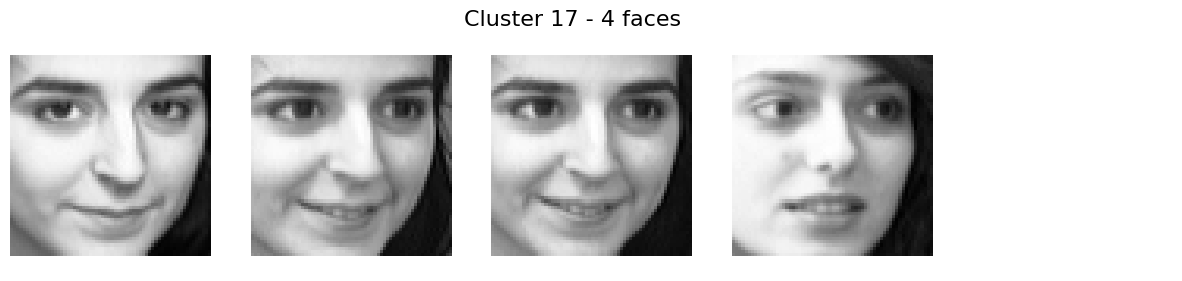

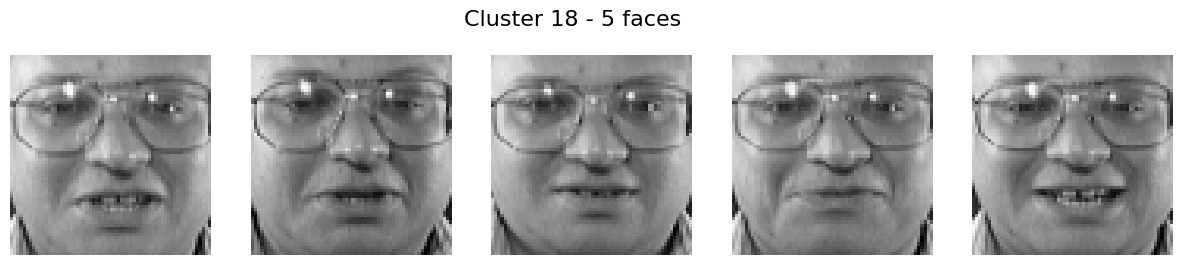

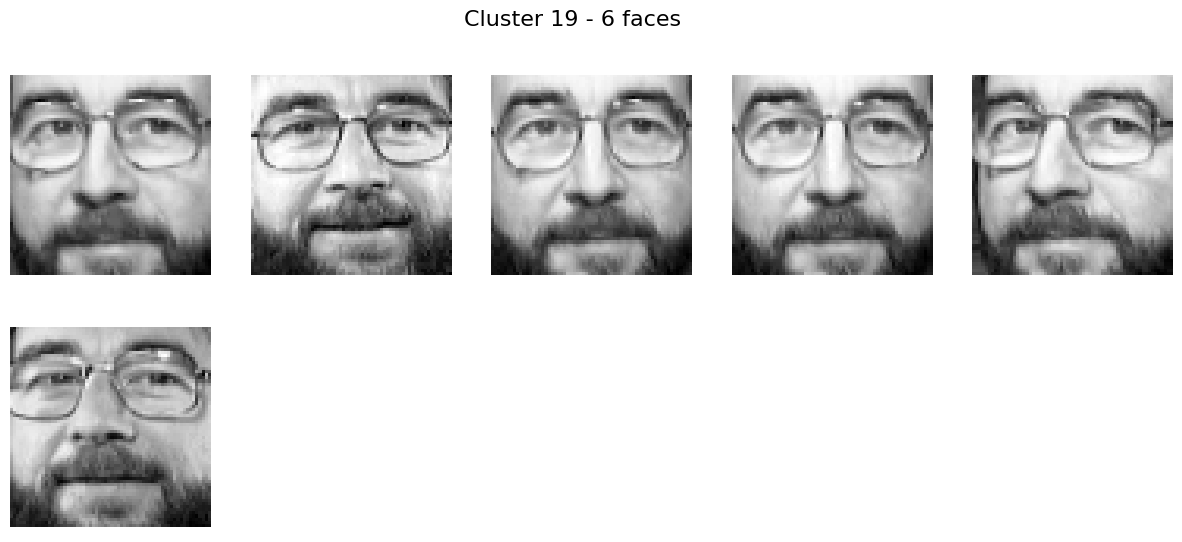

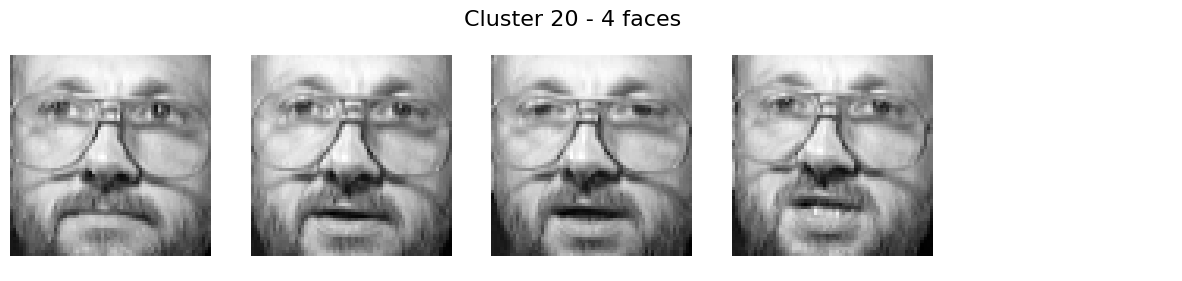

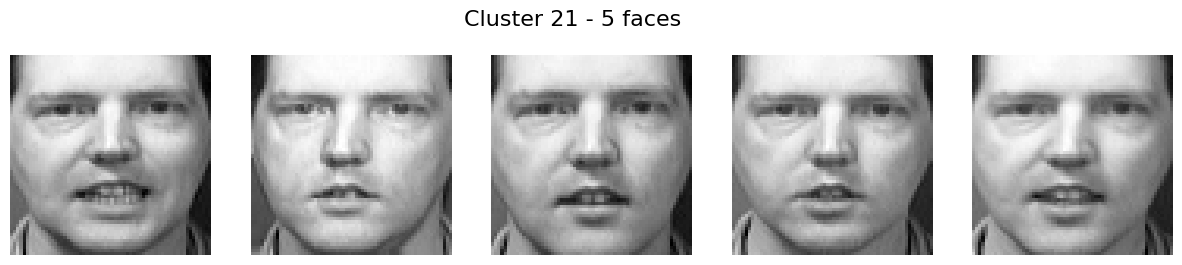

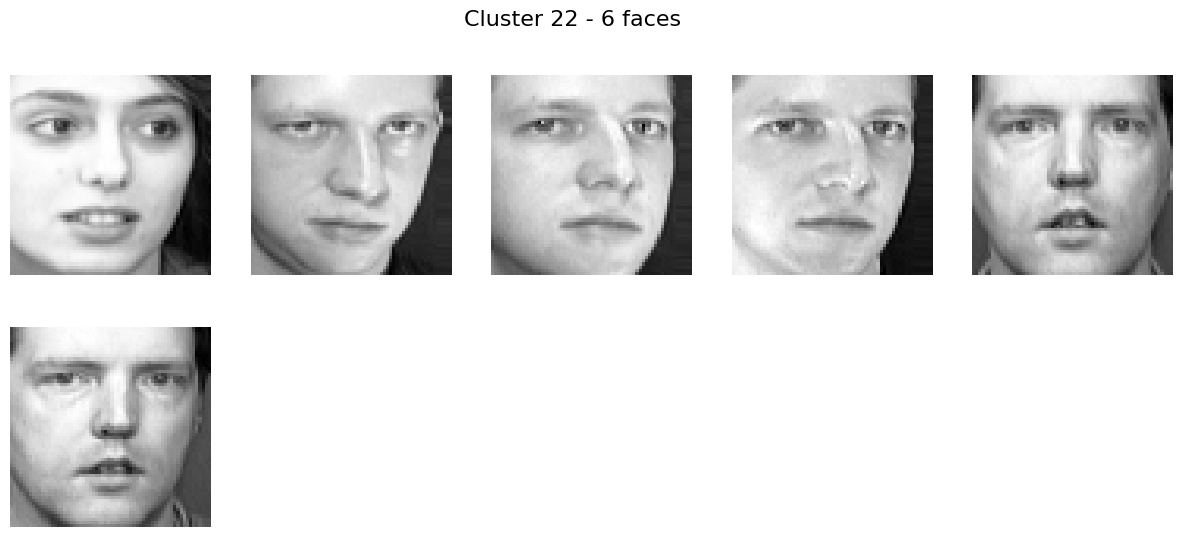

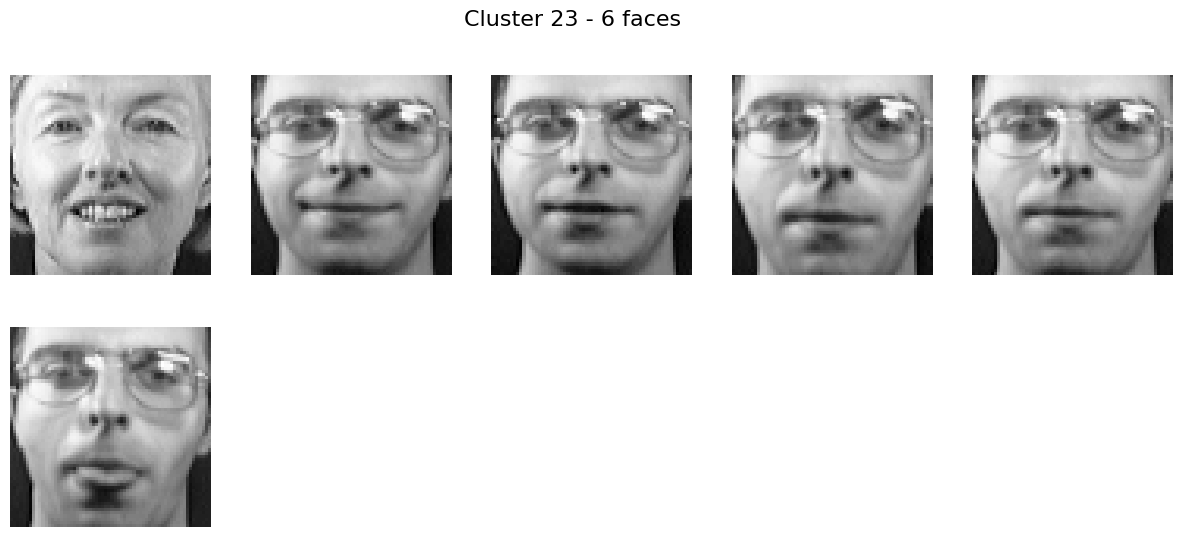

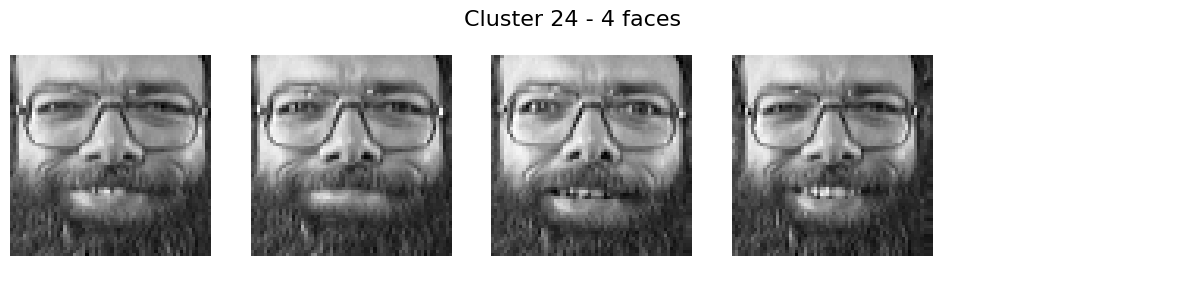

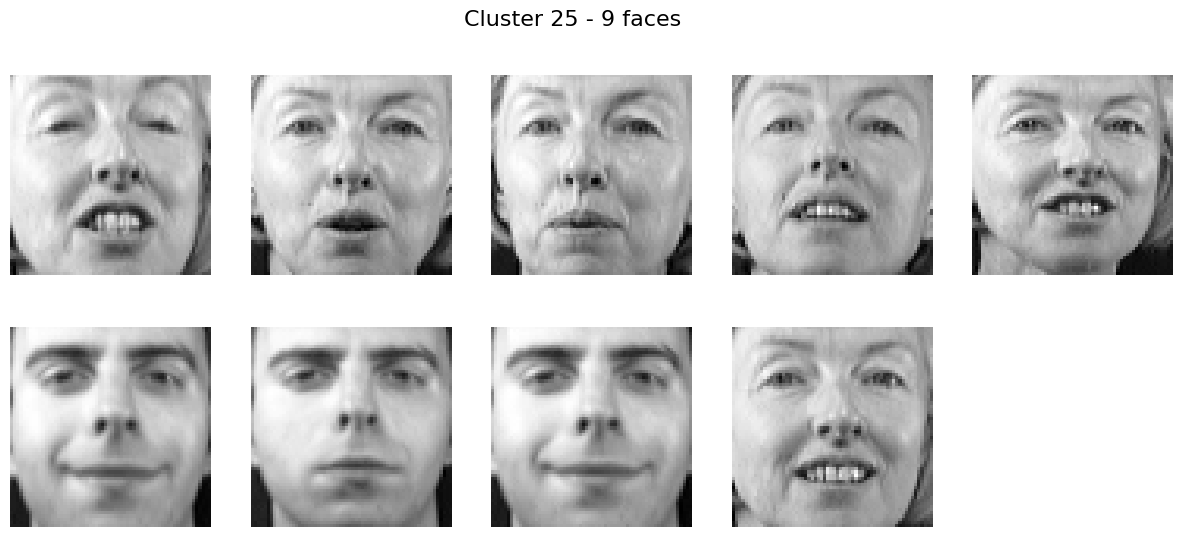

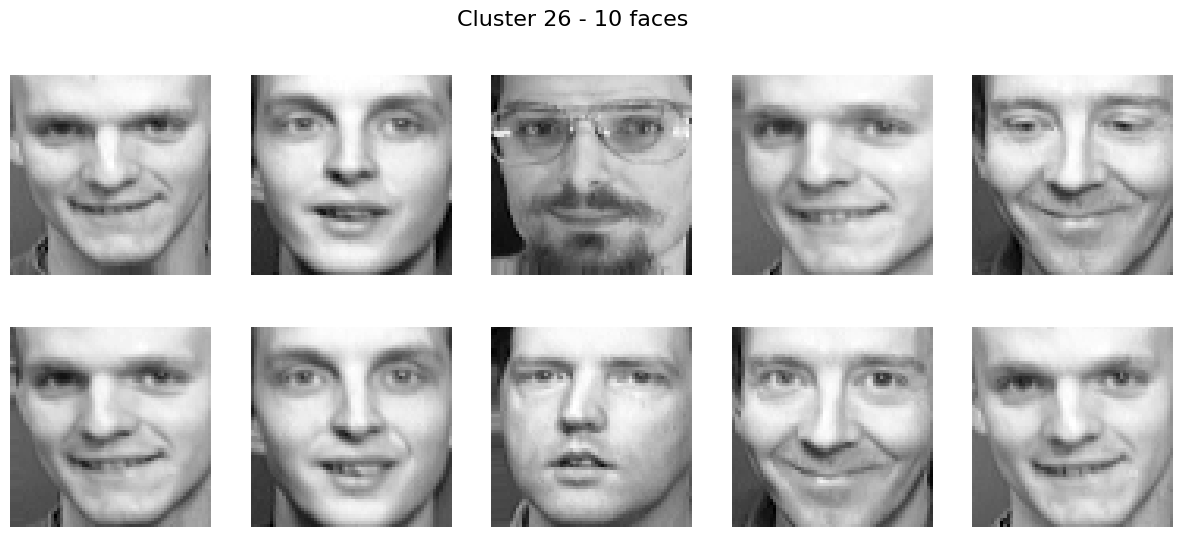

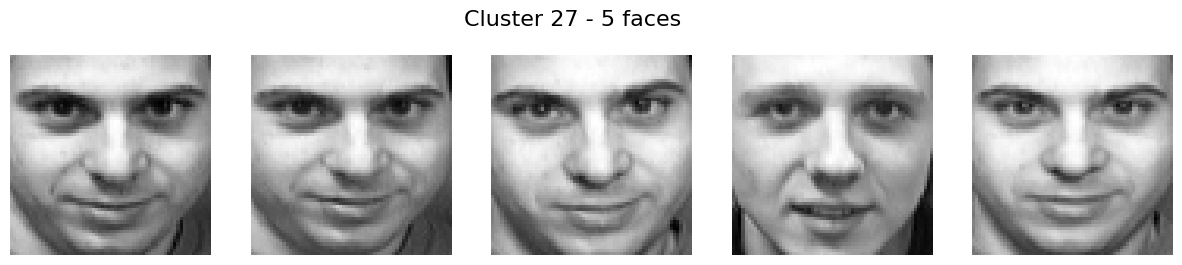

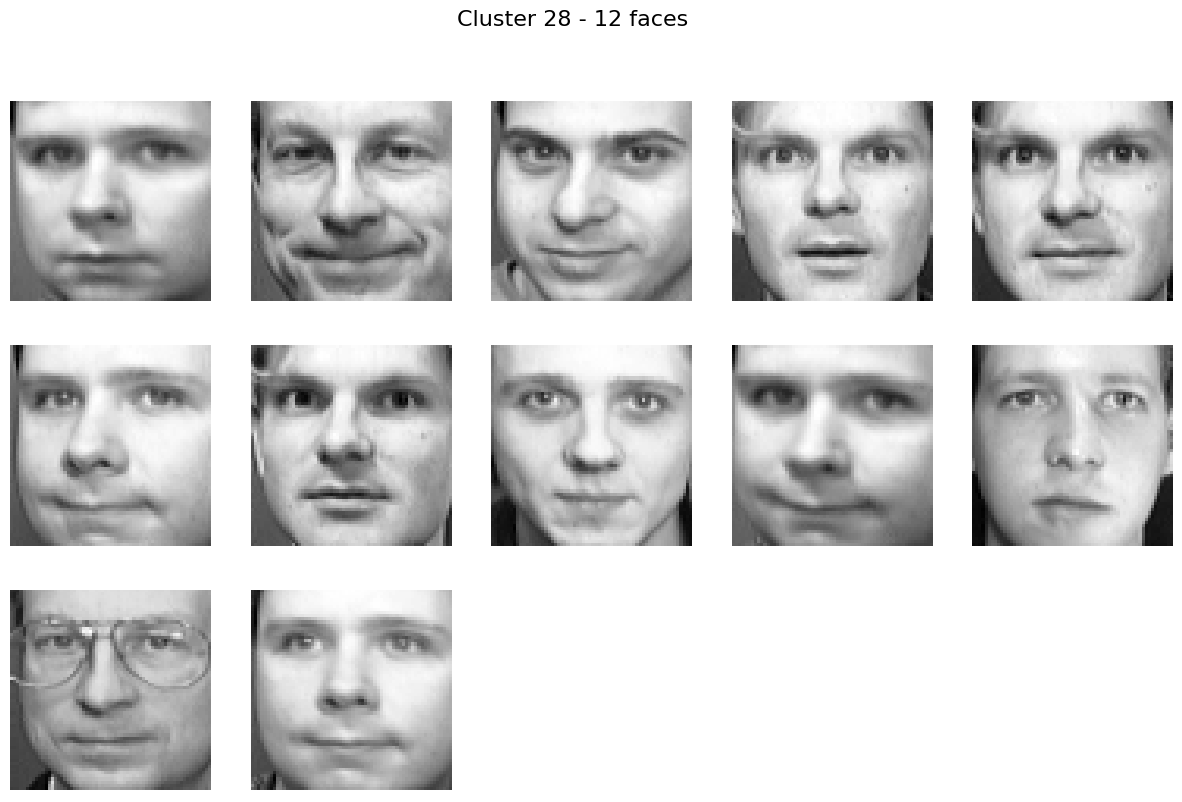

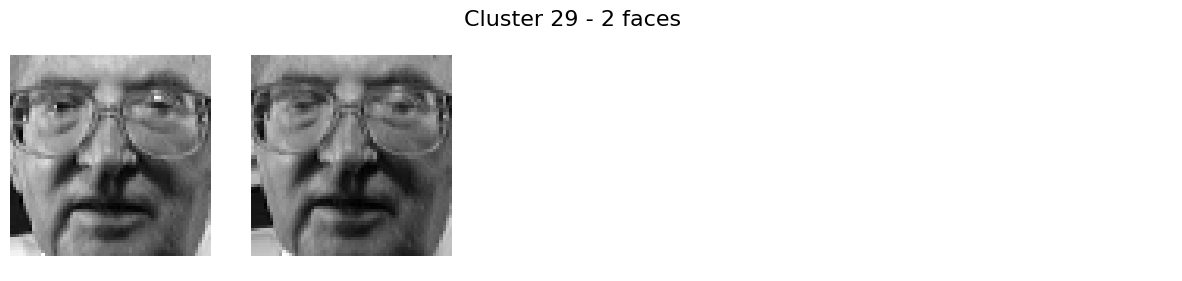

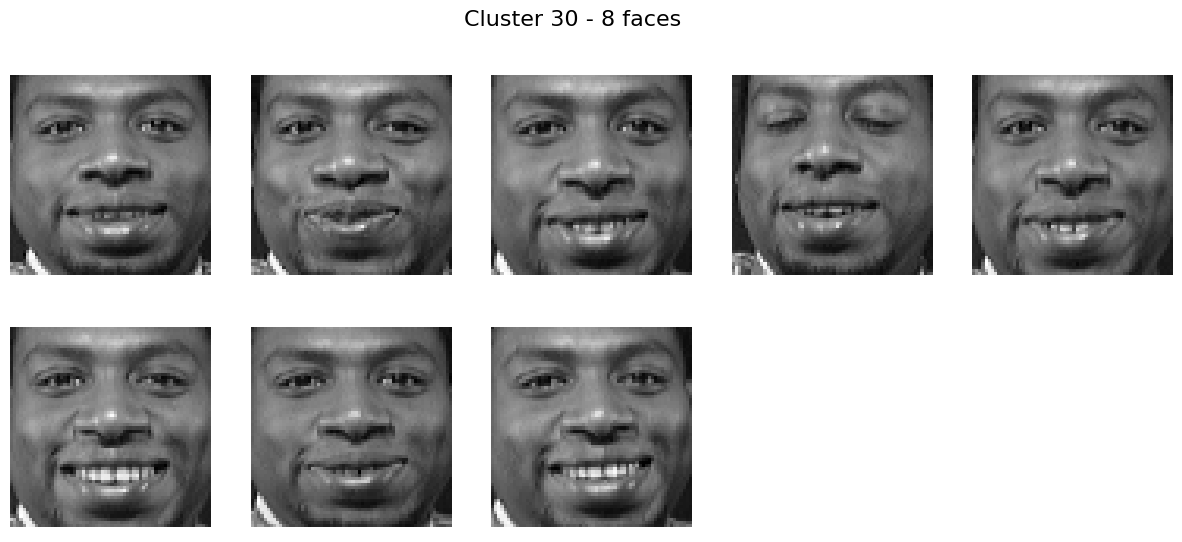

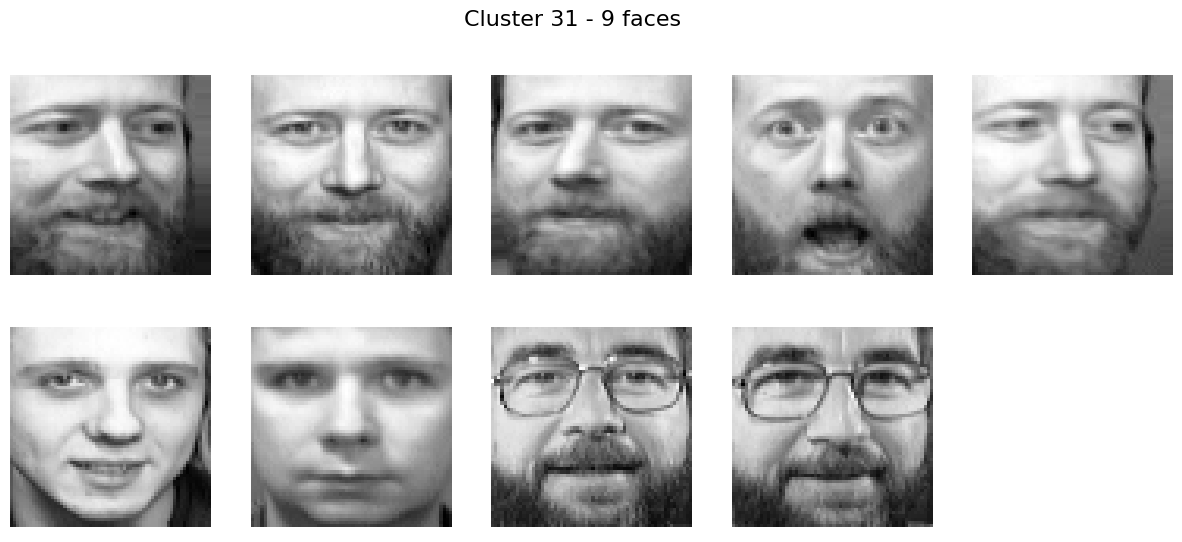

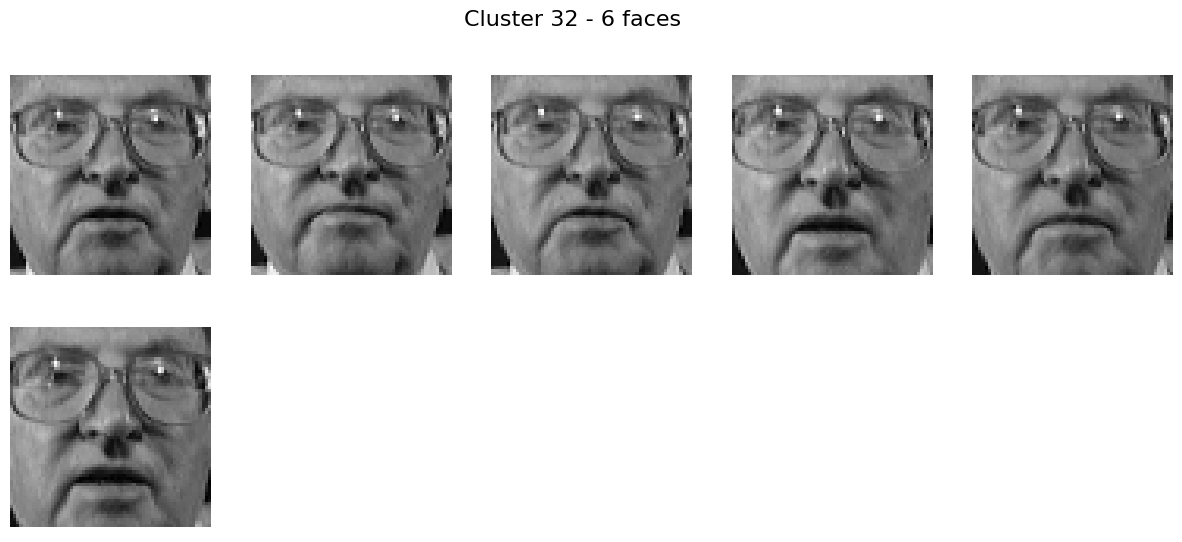

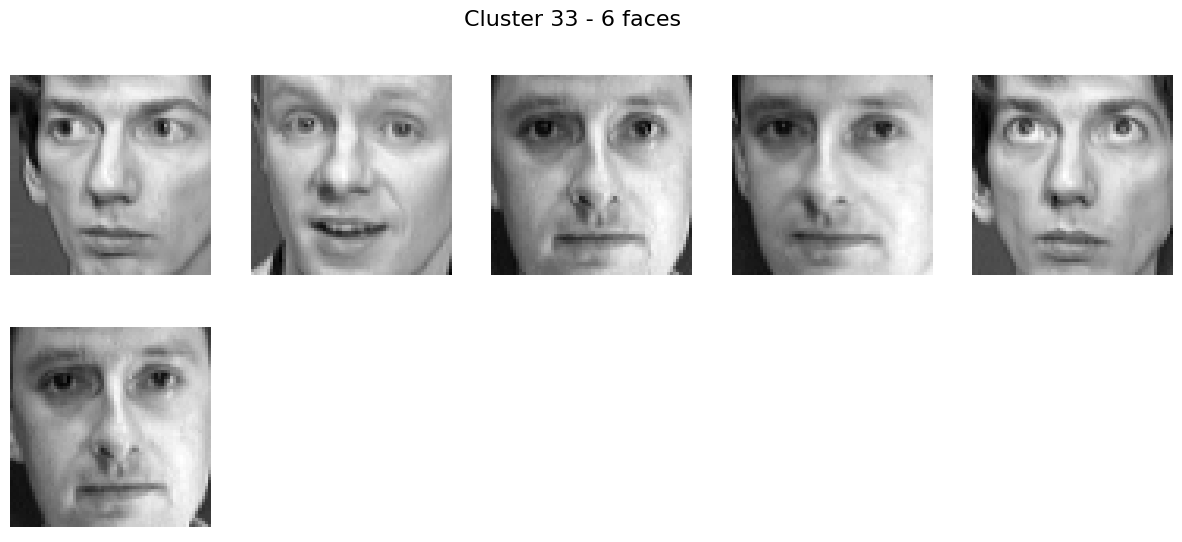

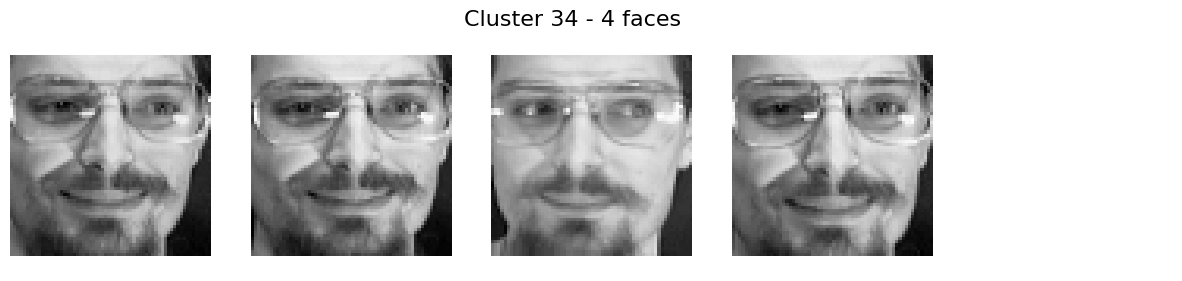

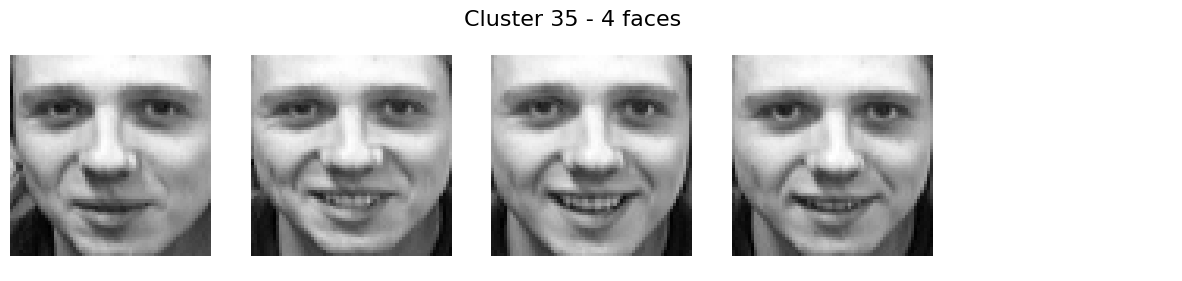

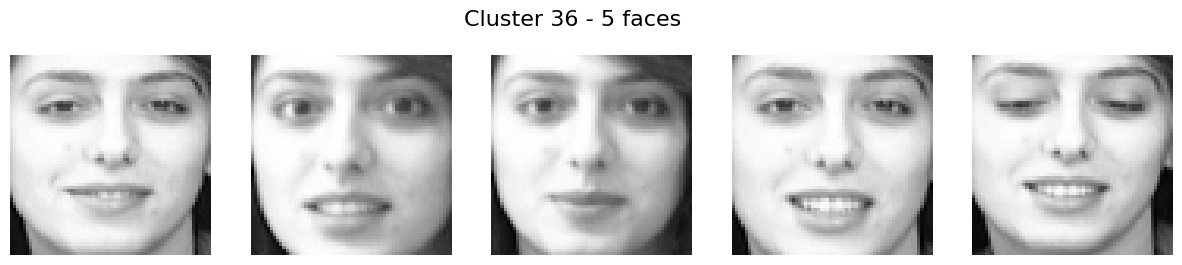

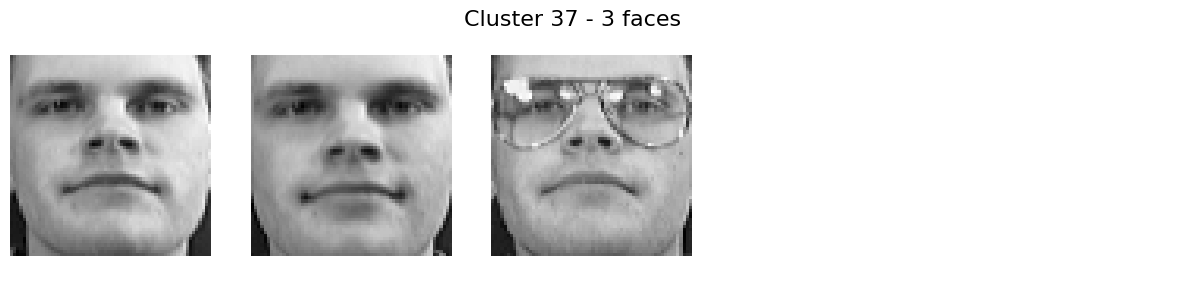

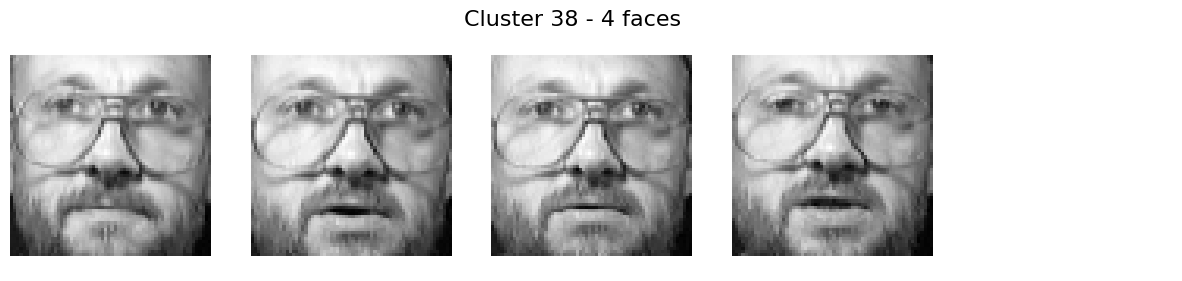

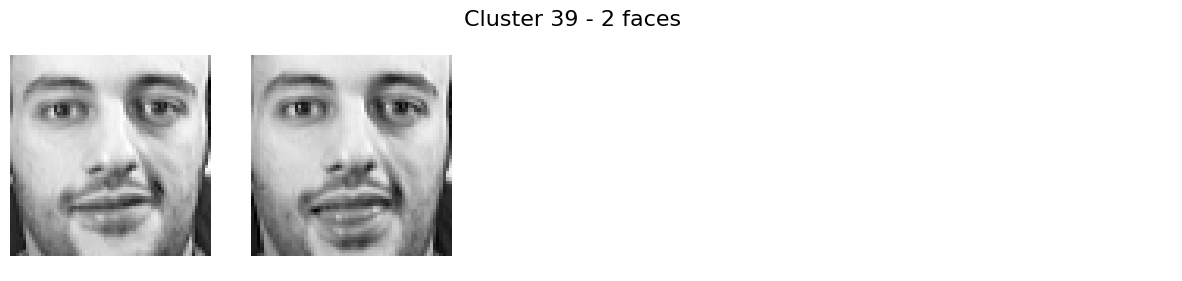

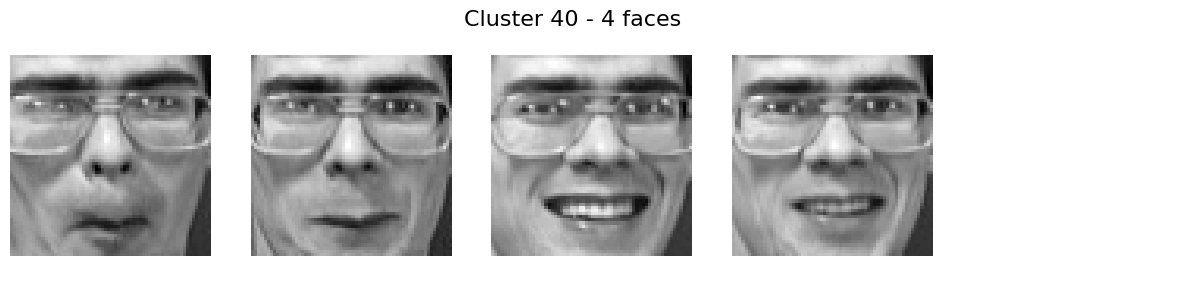

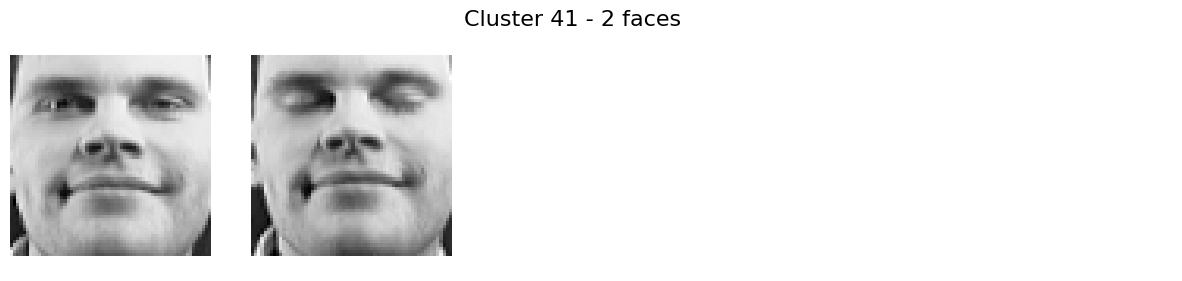

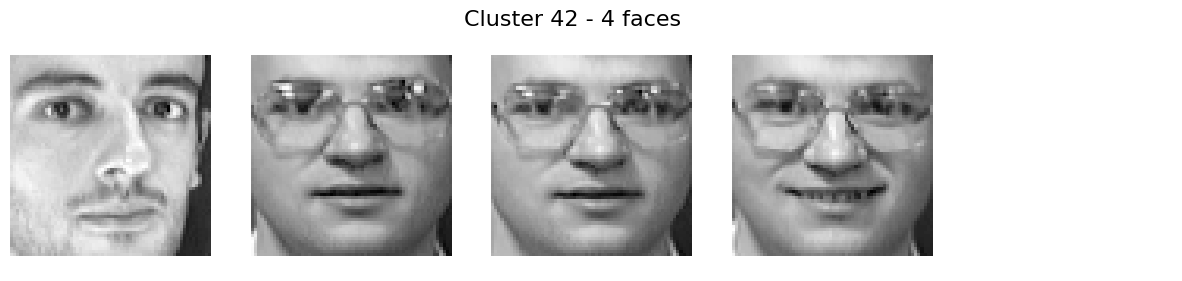

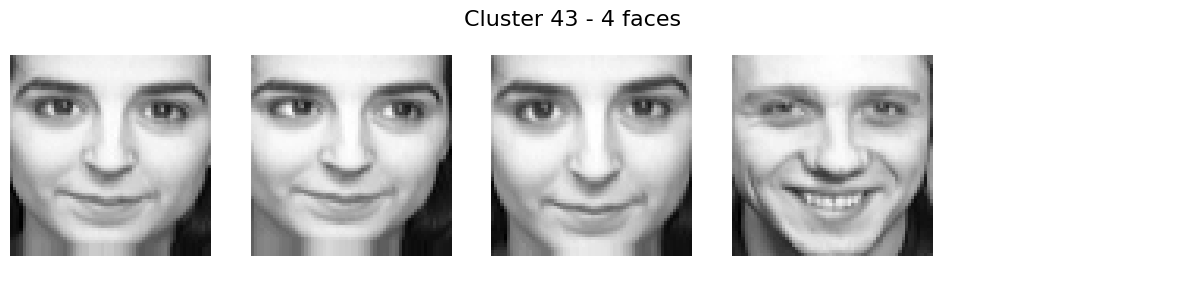

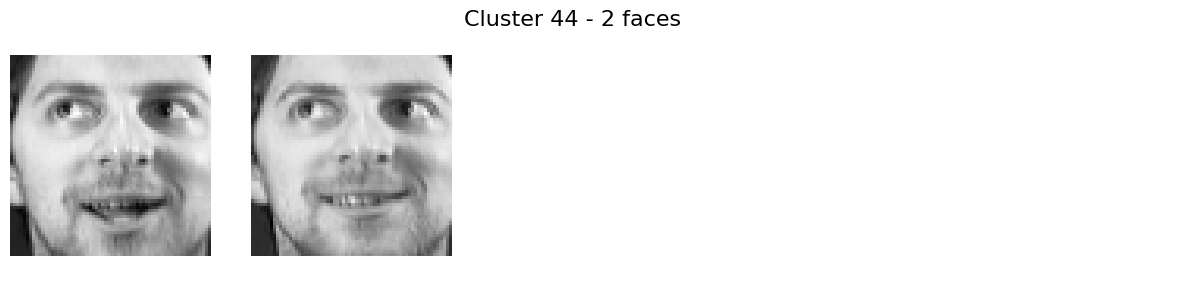

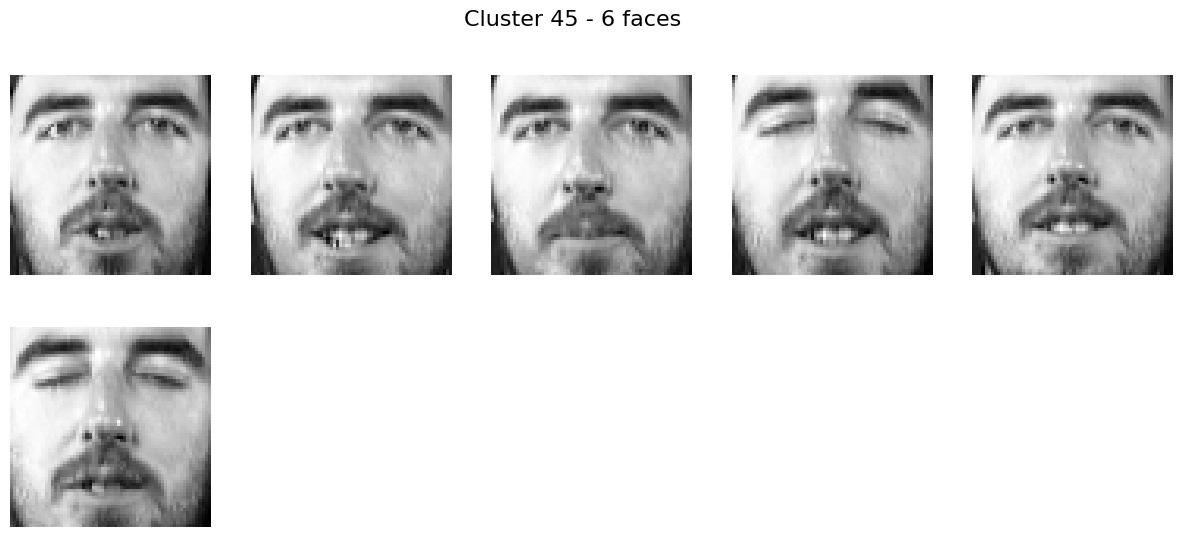

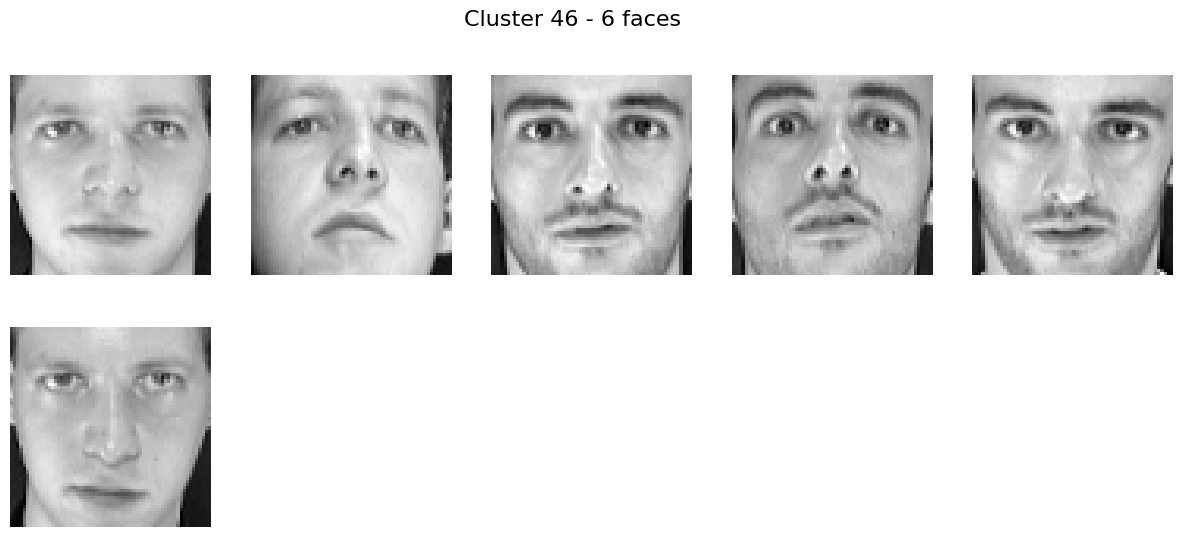

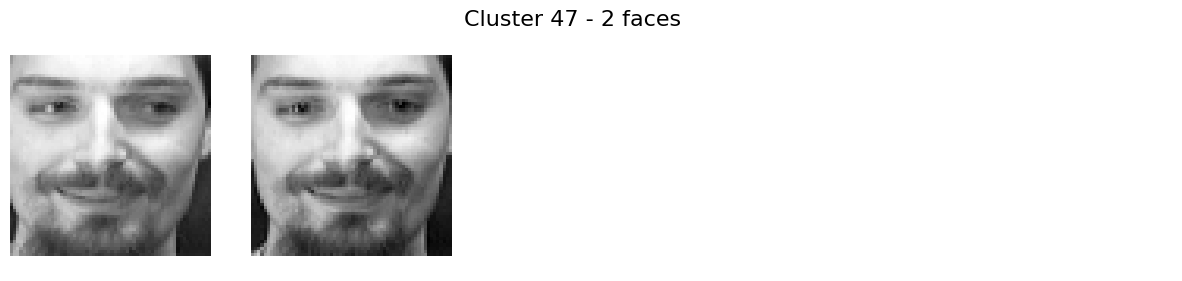

In [20]:
# plot_faces 함수 호출하여 얼굴 이미지 출력
plot_faces(X_train, labels, n_clusters=48)